# Homework - Principal Component Analysis

#### The CDC Social Vulnerability Index (SVI) takes multiple differen population-level inputs (e.g., % of the population living in poverty, % of the population without health insurance) to identify particularly vulnerable counties. While the CDC SVI scores rely on adding up the percentiles of various characteristics, there are alternative indexes (e.g., [University of South Carolina SoVI index](https://sc.edu/study/colleges_schools/artsandsciences/centers_and_institutes/hvri/data_and_resources/sovi/index.php)) that use methods like PCA. Here, we are going to use the CDC SVI data to create an alternative index based on PCA.

#### 1. The following variables are used in the SVI:
`EP_POV150, EP_UNEMP, EP_HBURD, EP_NOHSDP, EP_UNINSUR, EP_AGE65, EP_AGE17, EP_DISABL, EP_SNGPNT, EP_LIMENG, EP_MINRTY, EP_MUNIT, EP_MOBILE, EP_CROWD, EP_NOVEH, EP_GROUPQ, EP_NOINT`

In [44]:
import pandas as pd

In [45]:
merged_data = pd.read_csv('/Users/alejandroroacontreras/Library/CloudStorage/GoogleDrive-alejandro.roa.cs@gmail.com/Mi unidad/Pardee Rand Graduate School/Year 2/Introduction to ML/code/PRGS-Intro-to-ML-2024/data/processed/merged_data.csv', dtype={'FIPS':str})

In [46]:
merged_data.head(1000)

,FIPS,AVLN_AFREQ,AVLN_RISKR,CFLD_AFREQ,CFLD_RISKR,CWAV_AFREQ,CWAV_RISKR,DRGT_AFREQ,DRGT_RISKR,ERQK_AFREQ,...,EP_NOVEH,EP_GROUPQ,EP_NOINT,EP_AFAM,EP_HISP,EP_ASIAN,EP_AIAN,EP_NHPI,EP_TWOMORE,EP_OTHERRACE
0,01001,NaN,Not Applicable,NaN,Not Applicable,0.000000,No Rating,25.969774,Relatively Low,0.000431,...,4.0,0.9,10.9,19.6,3.2,1.1,0.1,0.0,3.3,0.2
1,01003,NaN,Not Applicable,3.684142,Relatively Low,0.000000,No Rating,12.353442,Relatively Moderate,0.000338,...,2.3,1.5,10.9,8.3,4.8,0.9,0.2,0.0,3.1,0.4
2,01005,NaN,Not Applicable,NaN,Not Applicable,0.000000,No Rating,43.956953,Relatively Low,0.000227,...,11.7,12.0,31.8,46.9,4.8,0.5,0.3,0.0,1.8,1.2
3,01007,NaN,Not Applicable,NaN,Not Applicable,0.000000,No Rating,28.894501,Very Low,0.000790,...,7.5,6.4,20.2,20.7,2.9,0.3,0.1,0.0,1.7,0.1
4,01009,NaN,Not Applicable,NaN,Not Applicable,0.000000,No Rating,28.152598,Relatively Low,0.000817,...,4.8,1.0,16.9,1.2,9.7,0.2,0.1,0.2,2.8,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,20195,NaN,Not Applicable,NaN,Not Applicable,0.495356,Relatively Low,35.636364,Relatively Low,0.000149,...,2.8,2.5,14.4,0.1,0.8,0.4,0.1,0.0,2.0,0.0
996,20197,NaN,Not Applicable,NaN,Not Applicable,0.371517,Relatively Low,18.454545,Relatively Low,0.000219,...,2.3,1.7,18.3,1.0,4.9,0.7,0.2,0.1,2.7,0.0
997,20199,NaN,Not Applicable,NaN,Not Applicable,0.866873,Relatively Moderate,60.454545,Relatively Moderate,0.000118,...,4.1,1.5,11.8,0.7,6.8,0.6,0.3,0.0,2.5,0.0
998,20201,NaN,Not Applicable,NaN,Not Applicable,0.433437,Relatively Low,5.500386,Relatively Low,0.000150,...,3.0,2.4,26.8,0.2,4.4,0.7,0.3,0.0,1.6,0.5


In [47]:
merge_columns_selection = ['EP_POV150', 'EP_UNEMP', 'EP_HBURD', 'EP_NOHSDP', 'EP_UNINSUR', 'EP_AGE65', 'EP_AGE17', 'EP_SNGPNT', 'EP_LIMENG', 
                      'EP_MINRTY', 'EP_MUNIT', 'EP_MOBILE', 'EP_CROWD', 'EP_NOVEH', 'EP_GROUPQ', 'EP_NOINT']

In [48]:
subset_merge = merged_data[merge_columns_selection]

In [49]:
subset_merge.head(1000)

,EP_POV150,EP_UNEMP,EP_HBURD,EP_NOHSDP,EP_UNINSUR,EP_AGE65,EP_AGE17,EP_SNGPNT,EP_LIMENG,EP_MINRTY,EP_MUNIT,EP_MOBILE,EP_CROWD,EP_NOVEH,EP_GROUPQ,EP_NOINT
0,20.2,2.8,19.7,9.6,7.4,15.6,23.4,5.6,0.4,27.4,3.9,15.6,1.4,4.0,0.9,10.9
1,18.3,3.4,23.2,8.4,9.3,21.2,21.2,4.2,0.8,17.7,16.6,10.2,1.9,2.3,1.5,10.9
2,37.7,5.8,25.1,23.5,10.7,19.8,20.7,11.3,2.0,55.4,1.4,29.2,3.8,11.7,12.0,31.8
3,29.0,8.7,23.2,21.1,8.4,16.8,21.2,7.2,0.3,25.8,2.7,30.6,1.3,7.5,6.4,20.2
4,22.9,6.0,19.4,18.2,10.2,18.3,23.0,5.3,2.2,14.3,0.9,23.9,2.3,4.8,1.0,16.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,14.4,2.6,13.6,5.5,7.7,27.6,18.8,2.8,0.0,3.4,2.8,3.2,0.0,2.8,2.5,14.4
996,11.2,3.0,15.1,3.4,8.1,21.0,23.2,3.4,0.2,9.6,0.9,5.8,2.0,2.3,1.7,18.3
997,25.4,2.2,9.5,7.4,4.4,24.8,23.4,0.6,1.2,10.9,1.2,6.3,1.8,4.1,1.5,11.8
998,15.9,1.8,12.3,6.5,5.6,23.8,22.7,3.5,1.4,7.7,1.0,2.6,2.1,3.0,2.4,26.8


In [50]:
###Missing values per column and row checkup 

In [51]:
missing_column = subset_merge.isnull().sum(axis=0)

In [52]:
missing_rows = subset_merge.isnull().sum(axis=1)

In [53]:
missing_column

EP_POV150     96
EP_UNEMP      96
EP_HBURD      96
EP_NOHSDP     96
EP_UNINSUR    96
EP_AGE65      96
EP_AGE17      96
EP_SNGPNT     96
EP_LIMENG     96
EP_MINRTY     96
EP_MUNIT      96
EP_MOBILE     96
EP_CROWD      96
EP_NOVEH      96
EP_GROUPQ     96
EP_NOINT      96
dtype: int64

In [54]:
missing_rows

0        0
1        0
2        0
3        0
4        0
        ..
3235    16
3236    16
3237    16
3238    16
3239    16
Length: 3240, dtype: int64

In [55]:
###Entire rows or columns checkup

In [56]:
comp_missing_column = missing_column[missing_column == subset_merge.shape[0]]
comp_missing_row = missing_rows[missing_rows == subset_merge.shape[1]]

In [57]:
comp_missing_column

Series([], dtype: int64)

In [58]:
comp_missing_row

309     16
310     16
311     16
312     16
313     16
        ..
3235    16
3236    16
3237    16
3238    16
3239    16
Length: 96, dtype: int64

In [59]:
missing_summary = {
    'missing_columns': comp_missing_column.index.tolist(),
    'missing_rows': comp_missing_row.index.tolist(),
    'scattered_missing': subset_merge.isnull().any(axis=1).sum(),
    'total_rows': subset_merge.shape[0],
    'total_columns': subset_merge.shape[1]
}

In [60]:
missing_summary

{'missing_columns': [],
 'missing_rows': [309,
  310,
  311,
  312,
  313,
  314,
  315,
  316,
  3152,
  3153,
  3154,
  3155,
  3156,
  3157,
  3158,
  3159,
  3160,
  3161,
  3162,
  3163,
  3164,
  3165,
  3166,
  3167,
  3168,
  3169,
  3170,
  3171,
  3172,
  3173,
  3174,
  3175,
  3176,
  3177,
  3178,
  3179,
  3180,
  3181,
  3182,
  3183,
  3184,
  3185,
  3186,
  3187,
  3188,
  3189,
  3190,
  3191,
  3192,
  3193,
  3194,
  3195,
  3196,
  3197,
  3198,
  3199,
  3200,
  3201,
  3202,
  3203,
  3204,
  3205,
  3206,
  3207,
  3208,
  3209,
  3210,
  3211,
  3212,
  3213,
  3214,
  3215,
  3216,
  3217,
  3218,
  3219,
  3220,
  3221,
  3222,
  3223,
  3224,
  3225,
  3226,
  3227,
  3228,
  3229,
  3230,
  3231,
  3232,
  3233,
  3234,
  3235,
  3236,
  3237,
  3238,
  3239],
 'scattered_missing': np.int64(96),
 'total_rows': 3240,
 'total_columns': 16}

#### Are missing observations scattered throughout the data or are entire rows or columns missing?


It's a combination of both. Some rows are completely empty, while the scattered missing values are also present but not widespread. Overall, I detected approximately 96 rows that have at least one missing value. I didn't find missing columns

#### b. PCA cannot handle missing values by default.
#### There are several options for handling missing data generally, including imputation, removing rows with missing data, or removing columns with missing data. Deal with the missing data in a way that makes sense for the pattern of missing data and the goals of the analysis. Explain why you made this decision. Note: How you handle this is specific to the missing data pattern and the goals of the analysis. For example, when entire rows or columns are missing, imputation may not be appropriate and dropping those rows or columns is usually the best option. Conversely, if you have a general missingness pattern where missing observations are scattered throughout the data, imputation is likely the best option.

In [61]:
cleaned_data = subset_merge.dropna(how='all')


In [62]:
imputed_data=cleaned_data.fillna(cleaned_data.mean())

In [63]:
imputed_data.head(1000)

,EP_POV150,EP_UNEMP,EP_HBURD,EP_NOHSDP,EP_UNINSUR,EP_AGE65,EP_AGE17,EP_SNGPNT,EP_LIMENG,EP_MINRTY,EP_MUNIT,EP_MOBILE,EP_CROWD,EP_NOVEH,EP_GROUPQ,EP_NOINT
0,20.2,2.8,19.7,9.6,7.4,15.6,23.4,5.6,0.4,27.4,3.9,15.6,1.4,4.0,0.9,10.9
1,18.3,3.4,23.2,8.4,9.3,21.2,21.2,4.2,0.8,17.7,16.6,10.2,1.9,2.3,1.5,10.9
2,37.7,5.8,25.1,23.5,10.7,19.8,20.7,11.3,2.0,55.4,1.4,29.2,3.8,11.7,12.0,31.8
3,29.0,8.7,23.2,21.1,8.4,16.8,21.2,7.2,0.3,25.8,2.7,30.6,1.3,7.5,6.4,20.2
4,22.9,6.0,19.4,18.2,10.2,18.3,23.0,5.3,2.2,14.3,0.9,23.9,2.3,4.8,1.0,16.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,32.1,6.6,20.9,13.9,7.5,19.4,20.3,4.2,0.1,8.4,1.5,18.6,2.2,5.5,6.6,18.1
1004,26.6,7.3,22.4,13.5,8.2,17.6,23.0,8.0,0.4,5.9,1.6,19.9,2.6,6.4,0.9,20.3
1005,20.9,5.4,20.8,8.9,3.5,16.2,23.2,6.8,0.0,7.3,0.8,5.6,1.0,1.9,0.4,12.7
1006,25.9,5.2,18.0,7.9,3.7,22.3,20.1,4.8,0.0,8.1,0.4,20.5,2.7,5.4,1.5,14.8


I removed the entirely empty rows since they didn't contain useful information across any of the variables. For the remaining rows with partial missing data, I imputated the missing values. I decided to go with a mean imputation technique, since it is more straightforward. 

 #### c. After dealing with the missing data, perform PCA on the SVI variables.

In [64]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [65]:
merge_columns_selection = ['EP_POV150', 'EP_UNEMP', 'EP_HBURD', 'EP_NOHSDP', 'EP_UNINSUR', 'EP_AGE65', 'EP_AGE17', 'EP_SNGPNT', 'EP_LIMENG', 
                      'EP_MINRTY', 'EP_MUNIT', 'EP_MOBILE', 'EP_CROWD', 'EP_NOVEH', 'EP_GROUPQ', 'EP_NOINT']


In [66]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)

In [67]:
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

In [68]:
pca_columns = [f'PC{i+1}' for i in range(pca_result.shape[1])]
pca_df = pd.DataFrame(pca_result, columns=pca_columns)

In [69]:
explained_variance = pca.explained_variance_ratio_


In [70]:
pca_summary = {
    'explained_variance': explained_variance,
    'pca_results': pca_df.head()
}


In [71]:
pca_summary


{'explained_variance': array([0.29499638, 0.17263208, 0.11231197, 0.07174727, 0.06271151,
        0.06010755, 0.03865264, 0.03473028, 0.03131046, 0.02632549,
        0.02610364, 0.02062725, 0.01627195, 0.01244262, 0.01015048,
        0.00887841]),
 'pca_results':         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
 0 -0.958324  0.491195  0.967823 -0.413259 -0.779127 -0.175108  0.089751   
 1 -1.630961  1.197247 -0.239186  0.430627  0.298651 -0.711612 -0.223844   
 2  4.305308 -1.746434 -1.364082  0.506453 -1.086883  0.754973 -0.679192   
 3  1.889539 -1.472550 -0.847982 -0.326677 -1.050710 -0.048053  1.014097   
 4  0.489712 -0.966858  1.048579 -0.060745 -0.028786 -0.322363  0.777216   
 
         PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
 0 -0.197950  0.567810  0.572513  0.216869 -0.115019 -0.480947  0.299091   
 1  0.336012  0.987139  0.488645 -0.420124  0.159297  0.773096  0.127045   
 2 -0.605670 -0.452660  0.860009  1.148837 -0.12237

#### 1. Plot the eigenvectors or loadings associated of the first three principal components. Make sure that the axis labels correspond to the variable names and not the indices of the variables. How would you interpret the first three prinicpal components? Note: you can find the documentation for the SVI variables [here](https://www.atsdr.cdc.gov/placeandhealth/svi/documentation/SVI_documentation_2022.html).

In [72]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [73]:
cleaned_data = subset_merge[merge_columns_selection].dropna(how='all').fillna(subset_merge[merge_columns_selection].mean())

In [74]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_data)

In [75]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

In [76]:
loadings = pca.components_.T 

In [77]:
explained_variance_ratio = pca.explained_variance_ratio_

interpretation = {
    'explained_variance_ratio': explained_variance_ratio,
    'pc1_interpretation': "PC1 identifies the main variance contributors, often related to socio-economic stressors.",
    'pc2_interpretation': "PC2 may reveal variance related to demographic or age-related variables.",
    'pc3_interpretation': "PC3 could highlight unique patterns not captured by the first two PCs."
}

interpretation

{'explained_variance_ratio': array([0.29499638, 0.17263208, 0.11231197]),
 'pc1_interpretation': 'PC1 identifies the main variance contributors, often related to socio-economic stressors.',
 'pc2_interpretation': 'PC2 may reveal variance related to demographic or age-related variables.',
 'pc3_interpretation': 'PC3 could highlight unique patterns not captured by the first two PCs.'}

In [78]:
print(f"Loadings shape: {loadings.shape}, Variables: {len(merge_columns_selection)}")


Loadings shape: (16, 3), Variables: 16


In [79]:
scaled_loadings = loadings * 100  # Scale the loadings for better visualization


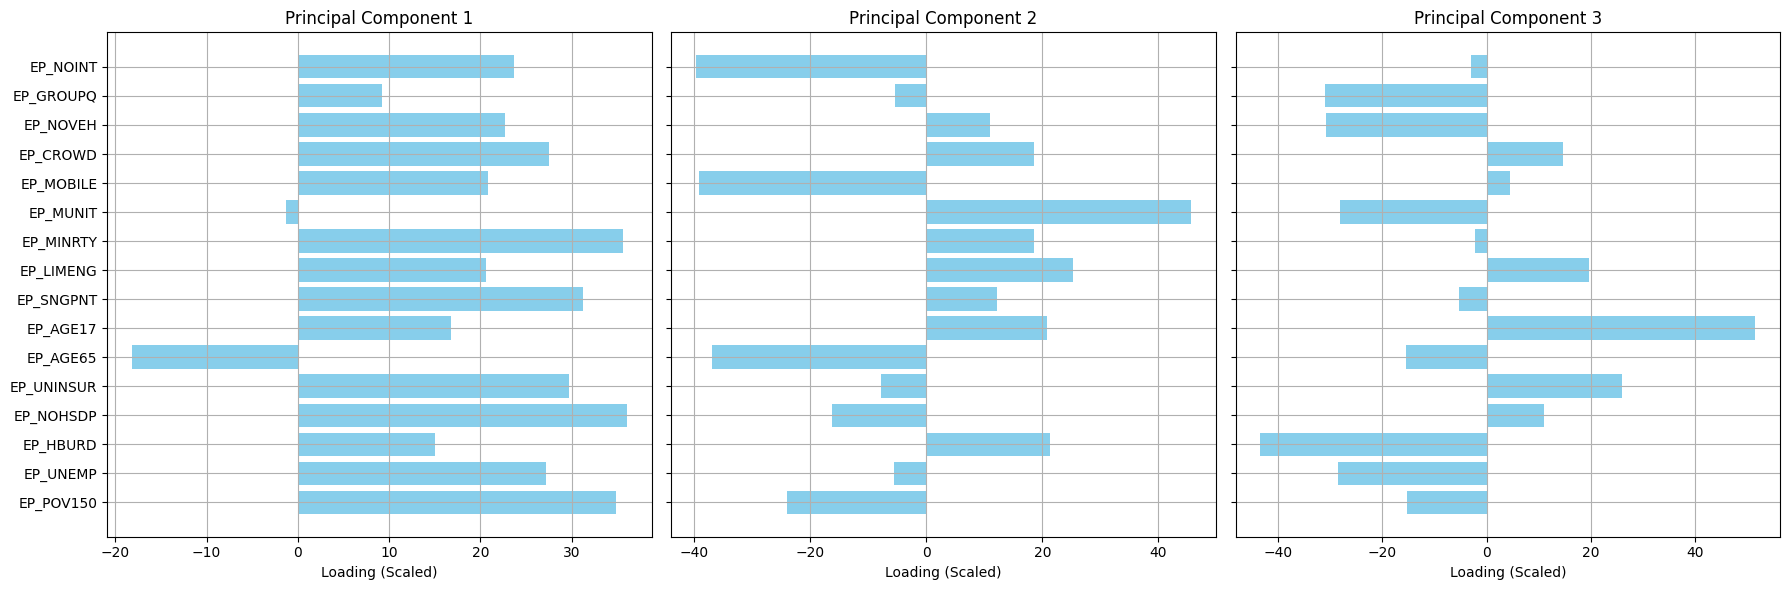

In [80]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, ax in enumerate(axes):
    ax.barh(merge_columns_selection, scaled_loadings[:, i], color='skyblue')
    ax.set_title(f'Principal Component {i + 1}')
    ax.set_xlabel('Loading (Scaled)')
    ax.grid(True)

plt.tight_layout()
plt.show()

PC1 focuses on identifying the variables that explain the largest amount of variance in the data.  This component captures socio-economic stress factors such as poverty, unemployment, crowding, and housing burden.

PC2 captures additional variance orthogonal to PC1 . In this case, PC2 captures disparities related to minority status, limited English proficiency, and low education levels. 

PC3 captures variance not explained by the first two components. This component focuses on age-related and healthcare vulnerabilities, highlighting age-related and healthcare vulnerabilities, reflecting areas with high proportions of elderly individuals, uninsured populations, and educational barriers. 

#### 1. There are several different ways to determine the number of principal components to retain. One common method is to retain principal components that explain a certain percentage of the variance in the data. 

#### a. How many principal components are needed to explain 80% of the variance in the data?

In [81]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

In [84]:
n_components_80 = np.searchsorted(cumulative_variance, 0.80) + 1 

In [85]:
print(f"Number of components needed to explain at least 80% of the variance: {n_components_80}")


Number of components needed to explain at least 80% of the variance: 4


#### b. How many principal components are needed to explain 90% of the variance in the data?


In [88]:
n_components_90 = np.searchsorted(cumulative_variance, 0.90) + 1 

In [90]:
print(f"Number of components needed to explain at least 90% of the variance: {n_components_90}")


Number of components needed to explain at least 90% of the variance: 4
